<a href="https://colab.research.google.com/github/vddavydova/colab/blob/main/example_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример анализа кейса про рынок труда


Исследуем рынок труда в России в 2019 году по данным опросника РМЭЗ НИУ ВШЭ (подробнее о нем [тут](https://www.hse.ru/rlms/)).

Импортируем библиотеки и настраиваем параметры графиков

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='darkgrid', palette='pastel', color_codes=True)
plt.rcParams['figure.figsize'] = (12, 6)

Создаем словарь для указания типов данных в колонках и словарь для переименования колонок. 

In [ ]:
## создаем словарь

cols = {
    'region':'category',
    'status':'category',
    ##'popul':'category',
    ##'ui3':'category',
    ##'ui4':'category',
    'u_age':int,
    'uh5':'category',
    'u_marst':'category',
    'u_diplom':'category',
    #'u_educ':'category',
    'u_occup08':'category',
    'uj1':'category',
    'uj4.1':'category',
    'uj13.2':float
}
rename_cols={
    'region':'region',
    'status':'town_type',
    ##'popul':'population',
    ##'ui3':'origin_type',
    ##'ui4':'nationality',
    'u_age':'age',
    'uh5':'sex',
    'u_marst':'marital_status',
    'u_diplom':'finished_education',
    #'u_educ':'education',
    'u_occup08':'professional_group',
    'uj1':'employed',
    'uj4.1':'industry',
    'uj13.2':'wage'}

cols_ = ['x'+x[1:] if x[0]=='u' else x for x in cols.keys()]
rename_cols = {('x'+key[1:] if key[0]=='u' else key):value   for key,value in rename_cols.items()}

Загружаем данные.

In [ ]:
#import `os` 
import os

# retrieve current working directory (`cwd`)
cwd = os.getcwd()
cwd

# change directory 
os.chdir("C:/Users/Виолетта")

# list all files and directories in current directory
#os.listdir('.')

In [ ]:
##df = pd.read_spss('r28i_os_32.sav', usecols=rename_cols.keys()) ## original data

df = pd.read_csv('./rlms19.csv', usecols=rename_cols.keys())
df.head()

,status,x_marst,x_occup08,x_diplom,x_age,region,xh5,xj1,xj4.1,xj13.2
0,ПГТ,Bдовец (вдова),работники сферы торговли и услуг,законченное среднее образование,64.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Вы сейчас работаете,ЗДРАВООХРАНЕНИЕ,25000.0
1,ПГТ,Никогда в браке не состояли,NaN,незаконченное среднее образование (7 - 8 кл) +...,75.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
2,ПГТ,Состоите в зарегистрированном браке,NaN,законченное среднее специальное образование,73.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
3,ПГТ,Состоите в зарегистрированном браке,NaN,незаконченное среднее образование (7 - 8 кл),65.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
4,ПГТ,Состоите в зарегистрированном браке,"квалифицированные рабочие, использующие машины...",законченное среднее образование,51.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Вы сейчас работаете,"ТРАНСПОРТ, СВЯЗЬ",18000.0


In [ ]:
df.shape

(12228, 10)

## Подготовка данных

Например, переименуем колонки в соответствии со словарем `rename_cols`.

In [ ]:
## your code here ╰( ͡° ͜ʖ ͡° )つ──☆

Можем заменить пропуски закодированные как `'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА'` на `np.nan`, используя метод `replace`.

In [ ]:
nans = ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']
## your code here ╰( ͡° ͜ʖ ͡° )つ──☆

Также
Используя метод `replace`, заменим категории `ЖЕНСКИЙ` на `Ж`, а `МУЖСКОЙ` на `М` в колонке `sex`.

In [ ]:
## your code here ╰( ͡° ͜ʖ ͡° )つ──☆

Или
В колонках `industry` и `marital_status` приведем символы к нижнему регистру и к заглавной букве. В колонке `industry` замените `It, информационные технологии` на `IT, информационные технологии`, используя метод `replace`.

In [ ]:
## your code here ╰( ͡° ͜ʖ ͡° )つ──☆

В колонке `'age'` приведем тип данных к `int`, а в `'wage'` к `float`, используя метод astype.


In [ ]:
## your code here ╰( ͡° ͜ʖ ͡° )つ──☆

Получим таблицу в следующем виде.

In [ ]:
df.info()
# инфо может не совпадать!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12228 entries, 0 to 12227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     12228 non-null  object 
 1   x_marst    10414 non-null  object 
 2   x_occup08  5107 non-null   object 
 3   x_diplom   10414 non-null  object 
 4   x_age      12228 non-null  float64
 5   region     12228 non-null  object 
 6   xh5        12228 non-null  object 
 7   xj1        10414 non-null  object 
 8   xj4.1      5107 non-null   object 
 9   xj13.2     4665 non-null   object 
dtypes: float64(1), object(9)
memory usage: 955.4+ KB


## Анализ данных

### Частоты категориальных колонок

Познакомимся с рынком труда России. Для этого можно дописать функцию info_count.

In [ ]:
def info_count(df, col):
    # рассмотрим долю каждой категории в некоторых категориальных колонках
    ## группируем таблицу df по колонке col
    ## считаем количество значений в каждой категории колонки col
    ## делаем сортировку по количеству значений
    ## делим сгруппированную таблицу на число без пропущенных значений, чтобы посчитать долю
    ## результат записываем в переменную g
    
    ## g = ## your code here ╰( ͡° ͜ʖ ͡° )つ──☆
    
    
    
    ## далее строится график
   # g.plot(kind='barh')
   # for index, value in enumerate(g):
    #    plt.text(value, index, str(round(value*100,1))+'%')
    #plt.grid(True)
    #plt.show()


In [ ]:
##plot_cols = ['town_type', 
            #'marital_status', 
           # 'professional_group',
           # 'finished_education', 
            #'age', 'region', 'wage'
           # 'sex', 
           # 'employed', 'industry',
          # ]
#for col in plot_cols:
  #  info_count(df, col)

### Gender wage gap

Можно создать две подвыборки: одну с мужчинами, чья зарплата меньше или равна 100 тыс. руб, и одну с женщинами, чья зарплата также ниже 100 тыс. руб. 

In [ ]:
m_under100k = ## your code here ╰( ͡° ͜ʖ ͡° )つ──☆
f_under100k = ## your code here ╰( ͡° ͜ʖ ͡° )つ──☆

И рассмотреть график. Можно ли говорить о значительной разнице в зарплатах между женщинами и мужчинами? 

[Подробнее о феномене](https://en.wikipedia.org/wiki/Gender_pay_gap).

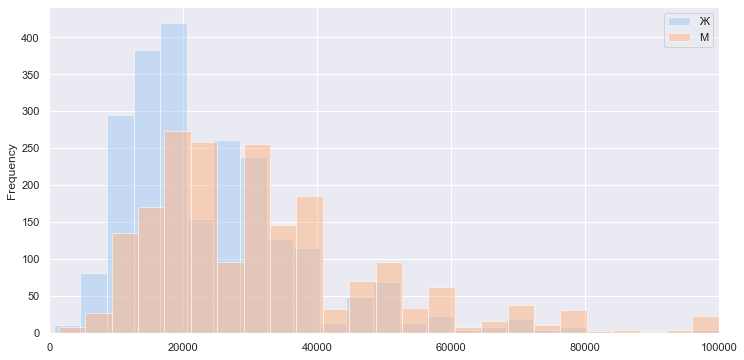

In [ ]:
bins=25
maxx=100000

f_under100k['wage'].plot(kind='hist', bins=bins, alpha=0.5, label='Ж')
m_under100k['wage'].plot(kind='hist', bins=bins, alpha=0.5, label='М')
plt.xlim(0,maxx)

plt.legend()
plt.show()